<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**1. Загрузить датасет**

In [2]:
data = pd.read_csv('creditcard_sampledata.csv')
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

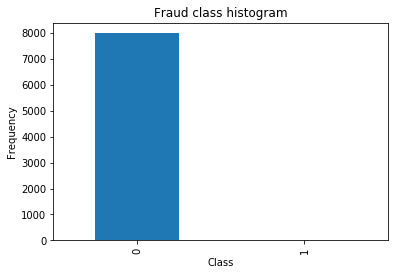

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [5]:
print(len(data[data['Class']==0]))
print(len(data[data['Class']==1]))

7983
17


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

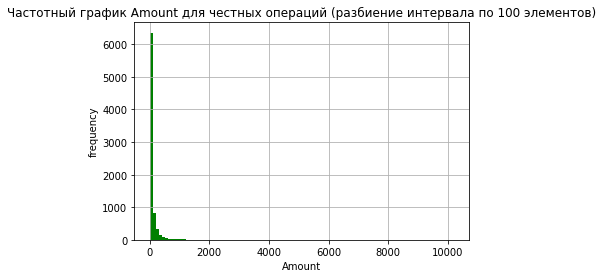

In [12]:
n, bins, patches = plt.hist(data[data['Class']==0]['Amount'], 100, facecolor='g')

plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Частотный график Amount для честных операций (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

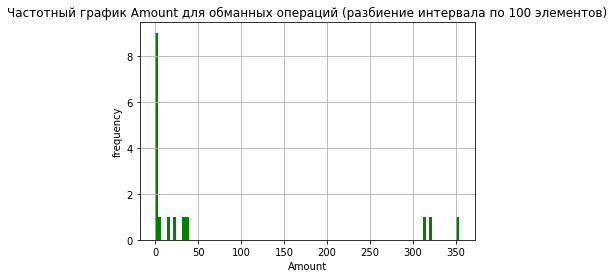

In [13]:
n, bins, patches = plt.hist(data[data['Class']==1]['Amount'], 100, facecolor='g')

plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Частотный график Amount для обманных операций (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

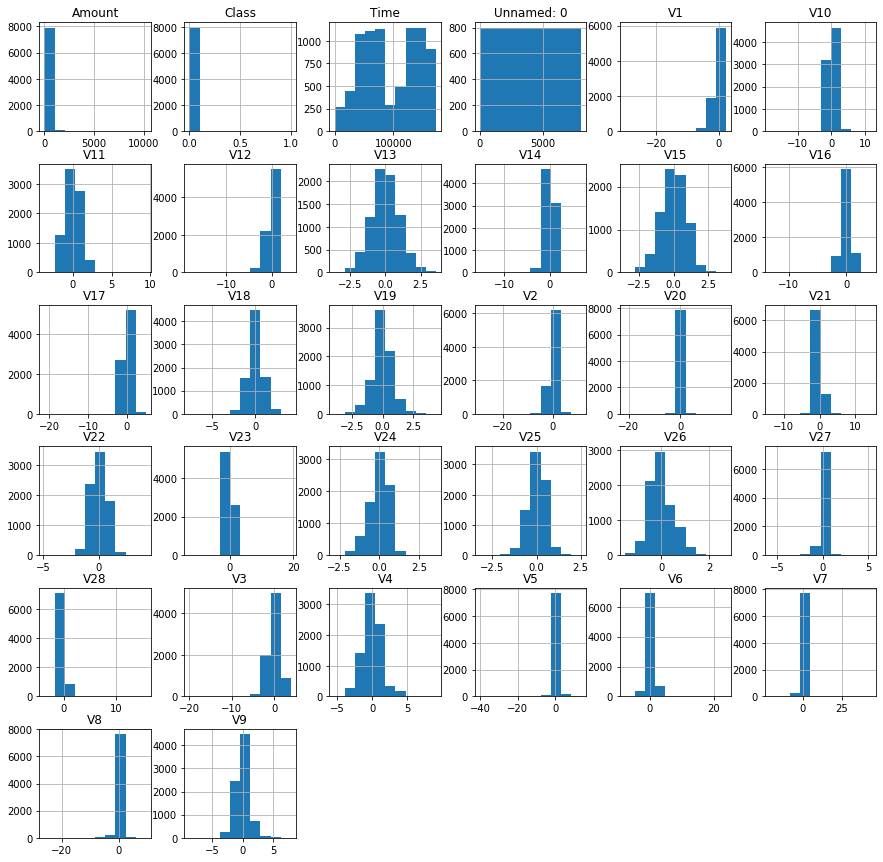

In [14]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [28]:
data_x = data.iloc[:,1:31]
# X.head()
data_x.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.098616,-0.009537,-0.437320,-0.110550,0.172695,-0.060099,0.074911,-0.042256,0.007375,...,-0.047073,0.054044,0.140803,0.062320,-0.015483,-0.239136,-0.045489,0.002586,0.002881,-0.007220
V1,0.098616,1.000000,-0.063021,-0.015822,0.028568,0.034826,-0.051049,-0.072567,0.002346,0.019942,...,0.009839,0.017185,-0.032750,-0.025266,0.003821,0.014042,0.000041,0.079838,-0.148136,-0.224344
V2,-0.009537,-0.063021,1.000000,0.007594,0.019968,0.090390,-0.083281,-0.058635,0.002035,0.016296,...,0.044050,-0.027053,0.015208,-0.029704,0.018672,-0.003122,-0.008100,0.057056,-0.146188,-0.521158
V3,-0.437320,-0.015822,0.007594,1.000000,0.018250,0.009357,-0.013523,-0.058963,0.013694,-0.000161,...,-0.006491,0.010440,-0.019828,-0.055459,-0.000456,-0.005477,-0.013444,0.010733,-0.051352,-0.221594
V4,-0.110550,0.028568,0.019968,0.018250,1.000000,-0.008018,0.036797,0.052969,-0.003877,0.023082,...,0.012492,-0.005630,-0.006219,0.042021,-0.016263,0.004869,0.002736,-0.040109,0.054368,0.109684
V5,0.172695,0.034826,0.090390,0.009357,-0.008018,1.000000,-0.009447,-0.072878,0.011247,0.007182,...,-0.096847,0.020156,-0.017838,-0.160162,0.008241,-0.025348,-0.016902,-0.016079,0.025215,-0.482093
V6,-0.060099,-0.051049,-0.083281,-0.013523,0.036797,-0.009447,1.000000,0.026514,0.004990,-0.000168,...,0.074061,-0.031449,0.020804,0.104574,-0.013156,0.011618,0.029252,-0.012457,-0.039613,0.283182
V7,0.074911,-0.072567,-0.058635,-0.058963,0.052969,-0.072878,0.026514,1.000000,-0.013508,-0.012348,...,0.074891,0.049178,0.007410,0.131986,0.003314,0.040029,0.032941,-0.029363,-0.006409,0.512710
V8,-0.042256,0.002346,0.002035,0.013694,-0.003877,0.011247,0.004990,-0.013508,1.000000,0.003333,...,-0.063119,0.164554,-0.053460,-0.044006,-0.006380,-0.010573,-0.003853,0.016203,-0.040055,-0.110621
V9,0.007375,0.019942,0.016296,-0.000161,0.023082,0.007182,-0.000168,-0.012348,0.003333,1.000000,...,-0.020323,-0.000637,0.014480,-0.037826,-0.000447,-0.034285,-0.002651,-0.026644,0.032157,-0.057394


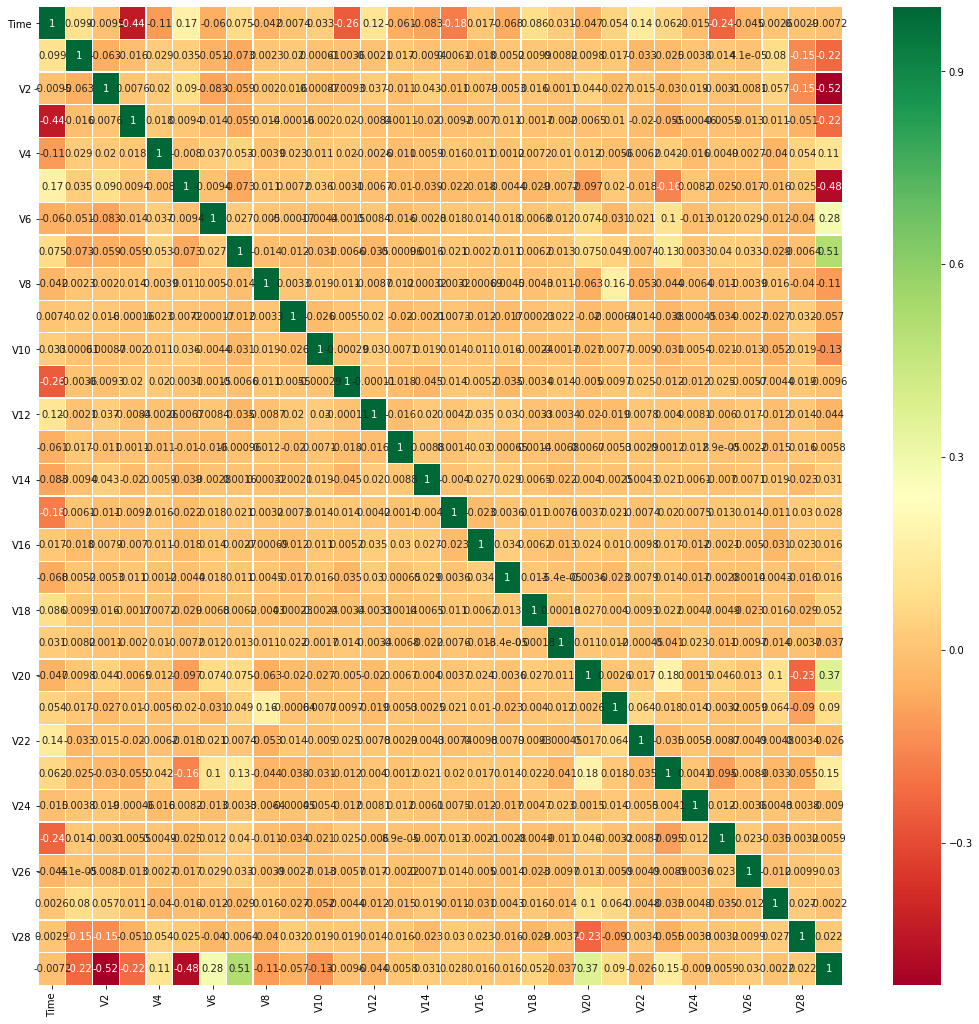

In [29]:
sns.heatmap(data_x.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(18,18)
plt.show()

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель логистической регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
y = data.Class
X = data.iloc[:,1:31]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1594
           1       1.00      0.17      0.29         6

    accuracy                           1.00      1600
   macro avg       1.00      0.58      0.64      1600
weighted avg       1.00      1.00      1.00      1600



Для класса “небезопасная транзакция” точность классификатора составляет  1.00  (100% положительных решений правильные), а полнота  0.17 (классификатор нашел 17% всех небезопасных транзакций).
Модель дает такой результат т.к. дата сет несбалансирован.

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать логистической регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [52]:
from sklearn.utils import resample

# создадим вектор X как общие данные (X и Y)
X = pd.concat([X_train, y_train], axis=1)

# разделим на 2 класса - fraud и non-fraud
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# уменьшаем выборку в бОльшим количеством элементов
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # без замены
                                n_samples = len(fraud), # количество = кол-во эл-тов в меньшей выборке
                                random_state = 0) # 

# объединим полученные данные с меньшей выборкой
downsampled = pd.concat([not_fraud_downsampled, fraud])

# проверим количество
downsampled.Class.value_counts()

1    11
0    11
Name: Class, dtype: int64

In [54]:
y_train = downsampled.Class
X_train = downsampled.iloc[:,1:31]

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

print(classification_report(y_test, undersampled_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1594
           1       0.00      1.00      0.01         6

    accuracy                           0.00      1600
   macro avg       0.00      0.50      0.00      1600
weighted avg       0.00      0.00      0.00      1600



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Модель ухудшилась

**9. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

No handles with labels found to put in legend.


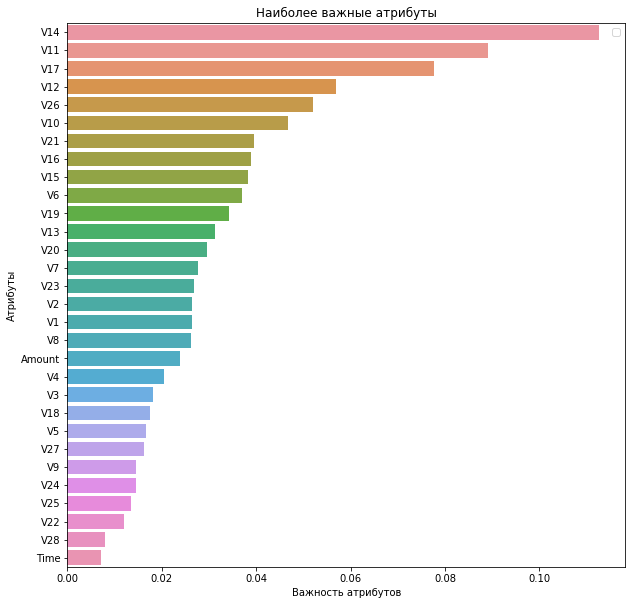

In [56]:
y = data.Class
X = data.iloc[:,1:31]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [57]:
model.score(X_test, y_test)

0.996875

In [63]:
X_train[:,:]

TypeError: '(slice(None, None, None), slice(None, None, None))' is an invalid key

In [64]:
y_test[0]

KeyError: 0

In [65]:
model.predict(X_test[:1,:])

TypeError: '(slice(None, 1, None), slice(None, None, None))' is an invalid key